# Optimisation and Machine Learning in Finance – Software


## Question (A)

Consider a scenario where an investor has £20,000 to invest in a combination of the following:
- Stock XYZ sells today at £20 per share.
- A European call option to buy 100 shares of stock XYZ at £15 per share exactly six months from
today sells for £1,000.
- The investor can also raise additional funds which can be immediately invested, if desired, by
selling call options with the above characteristics.
- In addition, a 6-month riskless zero-coupon bond with £100 face value sells for £90.

The investor has decided to limit the number of call options that they buy or sell to at most 50.

The investor considers three scenarios for the price of stock XYZ six months from today: the price will
be the same as today, the price will go up to £40, or drop to £12. The investor’s best estimate is that
each of these scenarios is equally likely. 


## Solution

**To Find:** Formulate and solve a linear program to determine the portfolio of stocks,
bonds, and options that maximises expected profit.

**Outline of the solution:**
1.  Formulating the Linear Program
 * Step 1: Decision Variable
 * Step 2: Formulate the Objective Function
 * Step 3: Formulate the Constraints
2.  Solving Linear Program
 * Finding the expected Profit
 * Visualization of Feasible Region


## Formulating the Linear Program

### Step 1: Decision Variables

Let x_1, x_2 and x_3 be the decision variables of number of bonds purchased, number of shares of stock XYZ purchased and number of call options purchased or sold, respectively.

x_1 = no. of bonds purchased  
x_2 = no. of shares of stock XYZ purchased  
x_3 = no. of call options purchased (if > 0) or sold (if < 0)

### Step 2: Formulate Objective Function

Here, we are computing the expected profits as follows:

Maximize expected profit = (1/3)*(profit if price remains the same + profit if price increases + profit if price decreases)

 * **Bonds:** A 6-month riskless zero-coupon bond with 100 pounds face value sells for 90 pounds. Therefore the expected profit on purchasing bond is $x_1$, 
implies $100-90 = 10$. 
 * **Stock XYZ:** Stock XYZ sells today at 20 pounds per share. Here investor considers three scenarios for the price of stock XYZ 6-months from today:
- *price will be the same as today*, in this scenario, the profit will be 20. 
- *price will go up to 40 pounds*, in this scenario ,instead of profit, investor get loss because he sold for 20 pounds and will buy for 40 pounds. This implies $20-40 = -20$. Therefore, since this scenario leads to loss, we consider it as $0$.
- *price will drop to 12 pounds* implies $12-20 = -8$.
- From the above three scenarios, the expected profit on purchasing shares of stock XYZ is x_2, implies
$1/3(20-0-8) = 12/3 = 4$.
 * **Call Option** A European call option is a type of financial contract that provides the purchaser with the right, but not the obligation, to buy a specified number of shares of an underlying stock at a predetermined price (known as the strike price) within a specified time frame. The investor in this scenario has the opportunity to purchase 100 shares of stock XYZ at £15 per share exactly six months from today, and the current price of the option is £1000. The investor is allowed to engage in both the buying and selling of call options, with the limitation that the total number of call options bought or sold cannot exceed 50.
- The investor has purchased a European call option to buy 100 shares of stock XYZ at 15 pounds per share, which means the total cost of purchasing 100 shares is 100 x 15 = 1500 pounds. 
- After six months, the investor sells the 100 shares for 1000 pounds. Therefore, the profit made from selling the shares is 1000 - 1500 = -500 pounds (a loss of 500 pounds).
- The investor will not exercise the call option as it is cheaper to buy the shares at the current market price. Therefore, the profit will be -£1,000 (the cost of purchasing the call option). 
- Similarly, for above considered three scenarios, we get  $1/3(1500-500-1000) = 0$. 
 

**Therefore, the Objective Function is**  

\begin{eqnarray*} \max_{x_1,x_2,x_3} & \hspace{1cm}&10 x_1 + 4 x_2 + 0 x_3\hspace{1cm} \end{eqnarray*}

                     

### Step 3: Formulate the constraints

From hypothesis, we get the following constraints,

* **Budget Constraint:** The variable $x_1$ represents the number of zero-coupon bonds purchased, which cost 90 pounds each, so the total cost of the bonds is 90$x_1$. Similarly, the variable $x_2$ represents the number of shares of stock XYZ purchased, which cost 20 pounds per share, so the total cost of the shares is 20$x_2$. Finally, the variable $x_3$ represents the number of call options purchased or sold, with a cost of 1000 pounds per option. This budget constraint states that the total cost of the portfolio, which is the sum of the cost of bonds, shares, and options, must be less than or equal to £20,000, which is the total amount of money the investor has available to invest.
Therefore  \begin{eqnarray*} 90 x_1 + 20 x_2 + 1000 x_3 <= 20000  \end{eqnarray*} 
* **Limit of Call Options:** the number of call options that the investor buys or sells cannot exceed 50 in either direction. This is because the investor wants to limit their exposure to the risks associated with buying or selling call options. The lower limit of -50 means that the investor cannot sell more than 50 call options, while the upper limit of 50 means that the investor cannot buy more than 50 call options. Therefore  \begin{eqnarray*} -50 <= x_3 <= 50 \end{eqnarray*}   
* **Non-Negative Constraint:**  The values of the decision variables representing the number of bonds, stocks, and call options purchased or sold cannot be negative. Therefore  \begin{eqnarray*}x_1,x_2 >=0 \end{eqnarray*}

**Therefore, the formulation of Linear Programming Problem** 

\begin{eqnarray*}
\max_{x_1,x_2,x_3} & \hspace{1cm}&10 x_1 + 4 x_2 + 0 x_3\hspace{1cm} &\text{%This is simply the profit equation}\\
\text{subject to} & \hspace{1cm}& 90𝑥_1+20𝑥_2+1000𝑥_3 &\leq 20000 &\hspace{1cm} \text{%Budget Constraint}\\
& \hspace{1cm}&x_3 &\leq 50 &\hspace{1cm} \text{%Upper Limit of Call option Constraint}\\
& \hspace{1cm}&x_3 &\geq -50 &\hspace{1cm} \text{%Lower Limit of Call option Constraint}\\
& \hspace{1cm}&x_1, x_2, x_3 &\geq 0 &\hspace{1cm} \text{% Non-Negative Constraint}
\end{eqnarray*}









## Solving Linear Program

### Finding the Expected Profit:

In [1]:
import gurobipy as gp

# Define decision variables
m = gp.Model("portfolio")
bonds = m.addVar(name="bonds", lb=0)
stock = m.addVar(name="stock", lb=0)
call_options = m.addVar(name="call_options",lb=-50,ub=50)

# Define objective function
m.setObjective(10*bonds + 4*stock, sense=gp.GRB.MAXIMIZE)

# Define constraints
m.addConstr(90*bonds + 20*stock + 1000*call_options <= 20000, name="budget_constraint")
m.addConstr(call_options <= 50, name="call_options_upper_bound")
m.addConstr(call_options >= -50, name="call_options_lower_bound")

# Optimize the model
m.optimize()

# Print results
print("Bonds purchased:", bonds.x)
print("Stock XYZ purchased:", stock.x)
print("Call options:", call_options.x)
print("Expected profit:", m.objVal)

Restricted license - for non-production use only - expires 2024-10-28
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 3 rows, 3 columns and 5 nonzeros
Model fingerprint: 0x04f96e90
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [4e+00, 1e+01]
  Bounds range     [5e+01, 5e+01]
  RHS range        [5e+01, 2e+04]
Presolve removed 3 rows and 3 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.4000000e+04   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.400000000e+04
Bonds purchased: 0.0
Stock XYZ purchased: 3500.0
Call options: -50.0
Expected profit: 14000.0


Therefore, we get
* Bonds purchased: $0.0$
* Stock XYZ purchased: $3500.0$
* Call options: $-50.0$
* Expected profit: $14000.0$

### Visualization of Feasible Region:

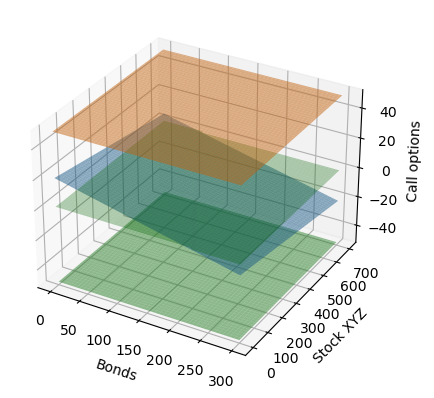

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the budget constraint
def budget_constraint(x, y):
    return (20000 - 90*x - 20*y) / 1000

# Define the call option constraints
def call_option_upper_bound(x, y):
    return 50*np.ones_like(x)

def call_option_lower_bound(x, y):
    return -50*np.ones_like(x)

# Create a grid of x and y values
x = np.linspace(0, 300, 100)
y = np.linspace(0, 700, 100)
X, Y = np.meshgrid(x, y)

# Calculate the values of the budget constraint and call option constraints on the grid
Z_budget = budget_constraint(X, Y)
Z_call_upper = call_option_upper_bound(X, Y)
Z_call_lower = call_option_lower_bound(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the budget constraint and call option constraints
ax.plot_surface(X, Y, Z_budget, alpha=0.5)
ax.plot_surface(X, Y, Z_call_upper, alpha=0.5)
ax.plot_surface(X, Y, Z_call_lower, alpha=0.5)

# Set the axis labels
ax.set_xlabel('Bonds')
ax.set_ylabel('Stock XYZ')
ax.set_zlabel('Call options')

# Get the feasible region
feasible_region = (Z_budget >= 0) & (Z_call_upper >= 0) & (Z_call_lower <= 0)

# Plot the feasible region
ax.plot_surface(X, Y, feasible_region, color='green', alpha=0.3)

# Show the plot
plt.show()

**Note:** The green surface is obtained by taking the intersection of the constraint surfaces that are non-negative or non-positive, depending on their type. Specifically, the budget constraint surface (the blue surface) is non-negative, the upper bound on the call options surface (the orange surface) is non-negative, and the lower bound on the call options surface (the purple surface) is non-positive. Therefore, the feasible region is the region where all three surfaces intersect, which is the green surface.

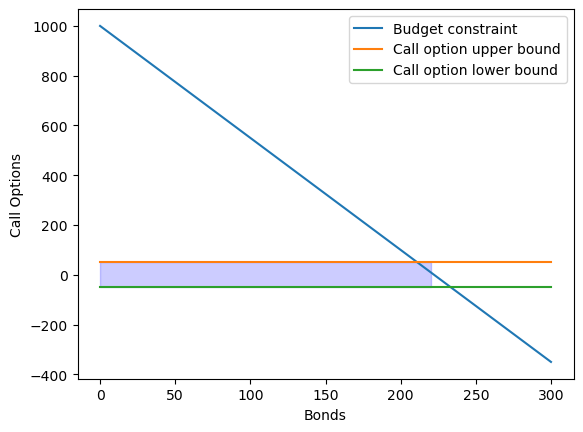

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Define the constraints
x = np.linspace(0, 300)
y_budget = (20000 - 90*x)/20
y_upper = 50*np.ones_like(x)
y_lower = -50*np.ones_like(x)

# Plot the constraints
plt.plot(x, y_budget, label='Budget constraint')
plt.plot(x, y_upper, label='Call option upper bound')
plt.plot(x, y_lower, label='Call option lower bound')

# Add labels and legend
plt.xlabel('Bonds')
plt.ylabel('Call Options')
plt.legend()

# Plot the feasible region
plt.fill_between(x, y_lower, y_upper, where=(y_upper>=y_lower)&(y_budget>=0), alpha=0.2, color='blue')

# Show the plot
plt.show()

**Note:** The above feasible regions and the finded optimal solution means that while the optimal portfolio, as determined by the linear programming formulation, has an expected profit of 14,000 pounds, this profit is not guaranteed under all possible scenarios. Specifically, if the price of stock XYZ were to go up to 40 pounds, the expected profit of the portfolio would turn negative, resulting in a loss of 5,000 pounds.

This highlights the importance of assessing the risks associated with a given portfolio and being aware that unforeseen events or changes in market conditions can have a significant impact on its performance.

## Question (B)

Suppose that the investor wants a profit of at least £2,000 in any of the three
scenarios for the price of XYZ six months from today.

## Solution

**To Find:** Formulate and solve a linear program that will maximise the investor’s expected profit under this additional constraint.

**Outline of the solution:**
1.  Formulating the Linear Program
2.  Solving Linear Program
 * Finding the expected Profit
 * Visualization of Feasible Region


## Formulating the Linear Program

Similar to the above formulated linear program, this linear program is designed to find the optimal investment strategy that maximizes the investor's expected profit while satisfying all the constraints, including the additional constraint that they want to earn at least 2000 pounds in any of the three scenarios.

Here, introducing three additional variable, $P_i$ = Profit in Scenario i, where i = 3 (profit will be same or will go-up or will drop)

**Therefore, the formulation of Linear Programming Problem** 

\begin{eqnarray*}
\max_{x_1,x_2,x_3} & \hspace{1cm}& 1/3 P_1 + 1/3 P_2 + 1/3  P_3 \hspace{1cm} &\text{%This is simply the profit equation}\\
\text{subject to} & \hspace{1cm}& 90𝑥_1+20𝑥_2+1000𝑥_3 &\leq 20000 &\hspace{1cm} \text{%Budget Constraint}\\
& \hspace{1cm}& 10 x_1 + 20 x_2 + 1500 x_3 &=  P_1 &\hspace{1cm} \text{%Profit in scenario 1 constraint}\\
& \hspace{1cm}& 10 x_1 − 500 x_3 &= P_2  &\hspace{1cm} \text{%Profit in scenario 2 constraint}\\
& \hspace{1cm}&10 x_1 − 8 x_2 − 1000 x_3 &= P_3 &\hspace{1cm} \text{%Profit in scenario 3 constraint}\\
& \hspace{1cm}&P_1 &\geq 2000 &\hspace{1cm} \text{%Minimum profit constraint for scenario 1}\\
& \hspace{1cm}&P_2 &\geq 2000 &\hspace{1cm} \text{%Minimum profit constraint for scenario 2}\\
& \hspace{1cm}&P_3 &\geq 2000 &\hspace{1cm} \text{%Minimum profit constraint for scenario 3}\\
& \hspace{1cm}&x_3 &\leq 50 &\hspace{1cm} \text{%Maximum limit of Call Option}\\
& \hspace{1cm}&x_3 &\geq -50 &\hspace{1cm} \text{%Minimum limit of Call Option}\\
& \hspace{1cm}&P_1,P_2,P_3,x_1,x_2,x_3 &\geq 0 &\hspace{1cm} \text{%Non-negativity constraint}
\end{eqnarray*}

## Solving Linear Program

### Finding the expected Profit

In [4]:
import gurobipy as gp

# Create a new model
model = gp.Model()

# Set the objective function
P1 = model.addVar(name="P1")
P2 = model.addVar(name="P2")
P3 = model.addVar(name="P3")
model.setObjective(1/3 * P1 + 1/3 * P2 + 1/3 * P3, sense=gp.GRB.MAXIMIZE)

# Add the constraints
x1 = model.addVar(lb=0, name="x1")
x2 = model.addVar(lb=0, name="x2")
x3 = model.addVar(lb=-50, ub=50, name="x3")
model.addConstr(90*x1 + 20*x2 + 1000*x3 <= 20000, name="budget_constraint")
model.addConstr(10*x1 + 20*x2 + 1500*x3 == P1, name="profit_scenario1_constraint")
model.addConstr(10*x1 - 500*x3 == P2, name="profit_scenario2_constraint")
model.addConstr(10*x1 - 8*x2 - 1000*x3 == P3, name="profit_scenario3_constraint")
model.addConstr(P1 >= 2000, name="min_profit_scenario1_constraint")
model.addConstr(P2 >= 2000, name="min_profit_scenario2_constraint")
model.addConstr(P3 >= 2000, name="min_profit_scenario3_constraint")

# Optimize the model
model.optimize()

# Print the optimal solution and objective value
print(f"Optimal solution: x1={x1.X}, x2={x2.X}, x3={x3.X}, P1={P1.X}, P2={P2.X}, P3={P3.X}")
print(f"Optimal objective value: {model.objVal}")

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: AMD Ryzen 9 5900HX with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 7 rows, 6 columns and 17 nonzeros
Model fingerprint: 0x46a0868d
Coefficient statistics:
  Matrix range     [1e+00, 2e+03]
  Objective range  [3e-01, 3e-01]
  Bounds range     [5e+01, 5e+01]
  RHS range        [2e+03, 2e+04]
Presolve removed 3 rows and 0 columns
Presolve time: 0.01s
Presolved: 4 rows, 6 columns, 14 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.6177223e+04   3.601495e+03   0.000000e+00      0s
       4    1.1200000e+04   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.03 seconds (0.00 work units)
Optimal objective  1.120000000e+04
Optimal solution: x1=0.0, x2=2800.0, x3=-36.0, P1=2000.0, P2=18000.0, P3=13600.0
Optimal objective value: 11200.0


Therefore, 
* The Optimal Objective Value: $11200.0$ 
* The optimal solution is $x_1 = 0.0$, $x_2 = 2800.0$, $x_3 = -36.0$, $P_1 = 2000.0$, $P_2 = 18000.0$, $P_3 = 13600.0$ 

### Visualization of Feasible Region

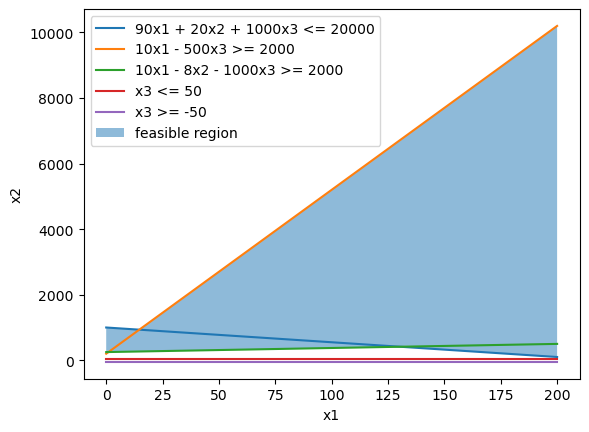

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define the constraint equations
x1 = np.linspace(0, 200, 500)
x2a = (20000 - 90*x1)/20
x2b = (2000 + 500*x1)/10
x2c = (2000 + 10*x1)/8
x3a = np.full_like(x1, 50)
x3b = np.full_like(x1, -50)

# Plot the constraint lines
plt.plot(x1, x2a, label="90x1 + 20x2 + 1000x3 <= 20000")
plt.plot(x1, x2b, label="10x1 - 500x3 >= 2000")
plt.plot(x1, x2c, label="10x1 - 8x2 - 1000x3 >= 2000")
plt.plot(x1, x3a, label="x3 <= 50")
plt.plot(x1, x3b, label="x3 >= -50")

# Shade the feasible region
x2_feasible = np.minimum(np.minimum(x2a, x2b), x2c)
plt.fill_between(x1, x2_feasible, np.maximum(x2a, np.maximum(x2b, x2c)), where=(x2_feasible>=0), alpha=0.5, label="feasible region")

# Set the axis labels and legend
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()

# Show the plot
plt.show()

**Note:** The feasible region is shaded in blue. The red lines are the inequality constraints and the blue lines are the equality constraints. The black lines represent upper and lower bounds. All lines intersect at points within the feasible region.